In [2]:
import os
import re
import random
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer  # Add TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import seaborn as sns
import matplotlib.pyplot as plt
# Step 1: Data Cleaning and Preprocessing

def clean_text(text):
    # Remove repeated words
    text = re.sub(r'\b(\w+)(\s+\1)+\b', r'\1', text)
    # Remove punctuation, numbers, and special characters
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    # Convert text to lowercase
    text = text.lower()
    # Remove past tense
    ps = PorterStemmer()
    tokens = word_tokenize(text)
    tokens = [ps.stem(token) for token in tokens]
    text = ' '.join(tokens)
    return text

def load_dataset(root_folder):
    data = []
    labels = []
    topics = ['accounts', 'biology', 'geography', 'history', 'maths', 'physics', 'software']
    for topic in topics:
        folder_path = os.path.join(root_folder, topic)
        files = os.listdir(folder_path)
        for file in files:
            file_path = os.path.join(folder_path, file)
            with open(file_path, 'r', encoding='utf-8') as f:  # Specify the encoding
                text = f.read()
                cleaned_text = clean_text(text)
                data.append(cleaned_text)
                labels.append(topic)
    return data, labels

root_folder = "C:/Users/samue/Downloads/data_assessment_2/data_for_topic_labelling"
data, labels = load_dataset(root_folder)

Classifier 1:
              precision    recall  f1-score   support

    accounts       1.00      0.99      0.99        85
     biology       0.90      0.98      0.94       191
   geography       1.00      0.48      0.65        29
     history       0.97      0.95      0.96       150
       maths       1.00      1.00      1.00        64
     physics       0.96      1.00      0.98       231
    software       1.00      0.97      0.98       193

    accuracy                           0.96       943
   macro avg       0.98      0.91      0.93       943
weighted avg       0.97      0.96      0.96       943

Classifier 2:
              precision    recall  f1-score   support

    accounts       1.00      0.99      0.99        85
     biology       0.90      0.98      0.94       191
   geography       1.00      0.48      0.65        29
     history       0.97      0.95      0.96       150
       maths       1.00      1.00      1.00        64
     physics       0.96      1.00      0.98       

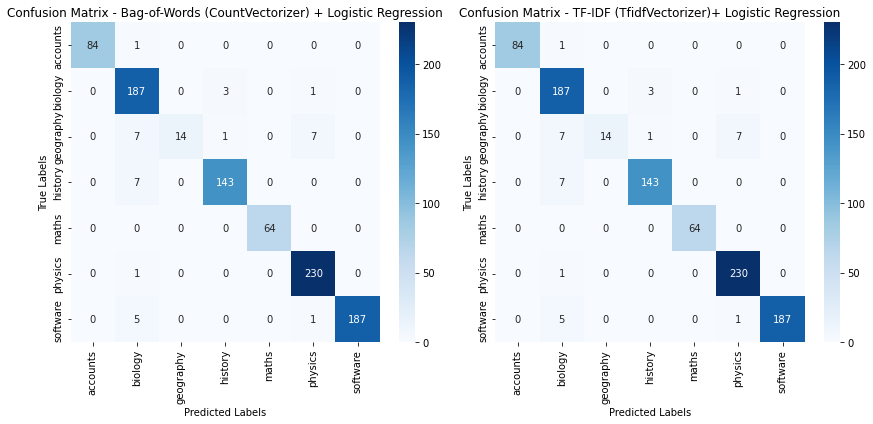

In [4]:
#Step 2: Splitting the Dataset
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, 
                                                                    test_size=0.3, stratify=labels, random_state=42)

# Step 3: Topic Modeling and Classification
# Version 1: Bag-of-Words (CountVectorizer) + Logistic Regression
classifier_1 = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('classifier', LogisticRegression())
])

# Version 2: TF-IDF (TfidfVectorizer) + Logistic Regression
classifier_2 = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', LogisticRegression())
])

# Fit the classifiers on the training data
classifier_1.fit(train_data, train_labels)
classifier_2.fit(train_data, train_labels)
# Evaluate the classifiers on the testing data
pred_labels_1 = classifier_1.predict(test_data)
pred_labels_2 = classifier_2.predict(test_data)

# Step 4: Performance Evaluation
# Define the topics list

topics = ['accounts', 'biology', 'geography', 'history', 'maths', 'physics', 'software']

# Classification report for classifier 1
print("Classifier 1:")
print(classification_report(test_labels, pred_labels_1))

# Classification report for classifier 2
print("Classifier 2:")
print(classification_report(test_labels, pred_labels_2))

# Confusion matrix for classifier 1
cm_1 = confusion_matrix(test_labels, pred_labels_1)
print("Confusion Matrix - Classifier 1:")
print(cm_1)

# Confusion matrix for classifier 2
cm_2 = confusion_matrix(test_labels, pred_labels_2)
print("Confusion Matrix - Classifier 2:")
print(cm_2)

# Plotting the heatmaps
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(cm_1, annot=True, cmap='Blues', fmt='d', xticklabels=topics, yticklabels=topics)
plt.title("Confusion Matrix - Bag-of-Words (CountVectorizer) + Logistic Regression")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

plt.subplot(1, 2, 2)
sns.heatmap(cm_2, annot=True, cmap='Blues', fmt='d', xticklabels=topics, yticklabels=topics)
plt.title("Confusion Matrix - TF-IDF (TfidfVectorizer)+ Logistic Regression")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

plt.tight_layout()
plt.show()

In [ ]:
import pyttsx3
# Generate classification report
report = classification_report(test_labels, pred_labels_1)

# Initialize the text-to-speech engine
engine = pyttsx3.init()

# Convert the classification report to speech
engine.say("Classification report:")
engine.say(report)

# Run the text-to-speech engine
engine.runAndWait()


Exception ignored in: <function BSTR.__del__ at 0x00000227CA0404C0>
Traceback (most recent call last):
  File "C:\Users\samue\anaconda3\lib\site-packages\comtypes\__init__.py", line 999, in __del__
    def __del__(self, _free=windll.oleaut32.SysFreeString):
KeyboardInterrupt: 
